In [2]:
# ingredients
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# get the data, EDA

In [3]:
arrests=pd.read_csv('USArrests.csv')
arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


- scale the data
- drop the object

# reshaping the data
- make the index the name of the state

In [6]:
#copy state to index
arrests.index=arrests.iloc[:,0]
arrests

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6
Colorado,Colorado,7.9,204,78,38.7
Connecticut,Connecticut,3.3,110,77,11.1
Delaware,Delaware,5.9,238,72,15.8
Florida,Florida,15.4,335,80,31.9


In [7]:
#drop state from columns
arrests=arrests.iloc[:,1:5]
arrests

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [8]:
#rename index
arrests.rename_axis(None, inplace=True)
arrests

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


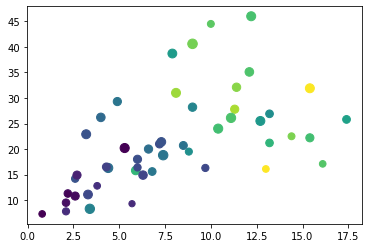

In [9]:
#one column on x, on on y, one on shape, one on colur=4

plt.scatter(arrests.iloc[:,0], arrests.iloc[:,3], arrests.iloc[:,2], arrests.iloc[:,1]);

# Apply clustering model - scale the data first

In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(arrests)

StandardScaler()

In [12]:
scaler.mean_

array([  7.788, 170.76 ,  65.54 ,  21.232])

In [13]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [14]:
arrests_scaled=scaler.transform(arrests)

In [15]:
arrests_scaled.shape

(50, 4)

In [16]:
#back into dataframe
type(arrests_scaled)

numpy.ndarray

In [17]:
arrests_scaled_df=pd.DataFrame(arrests_scaled,columns=[ 'murder' , 'assault' , 'urbanpop' , 'rape'])

In [18]:
arrests_scaled_df.describe()

,murder,assault,urbanpop,rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


In [19]:
arrests_scaled_df.head()

,murder,assault,urbanpop,rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


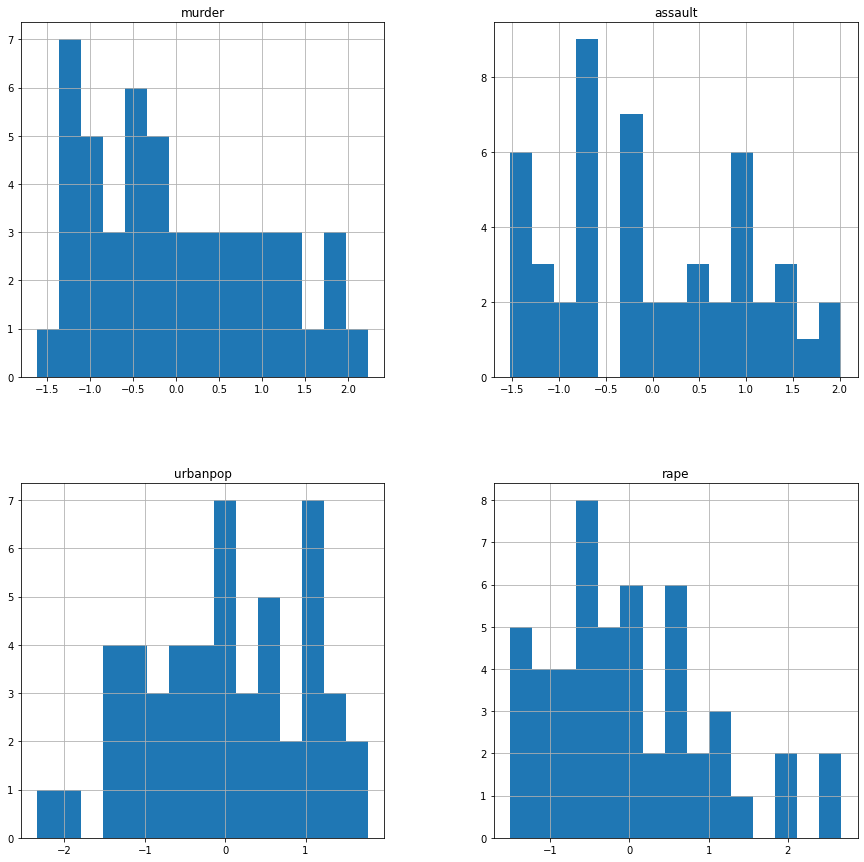

In [20]:
arrests_scaled_df.hist(bins=15,figsize=(15,15));

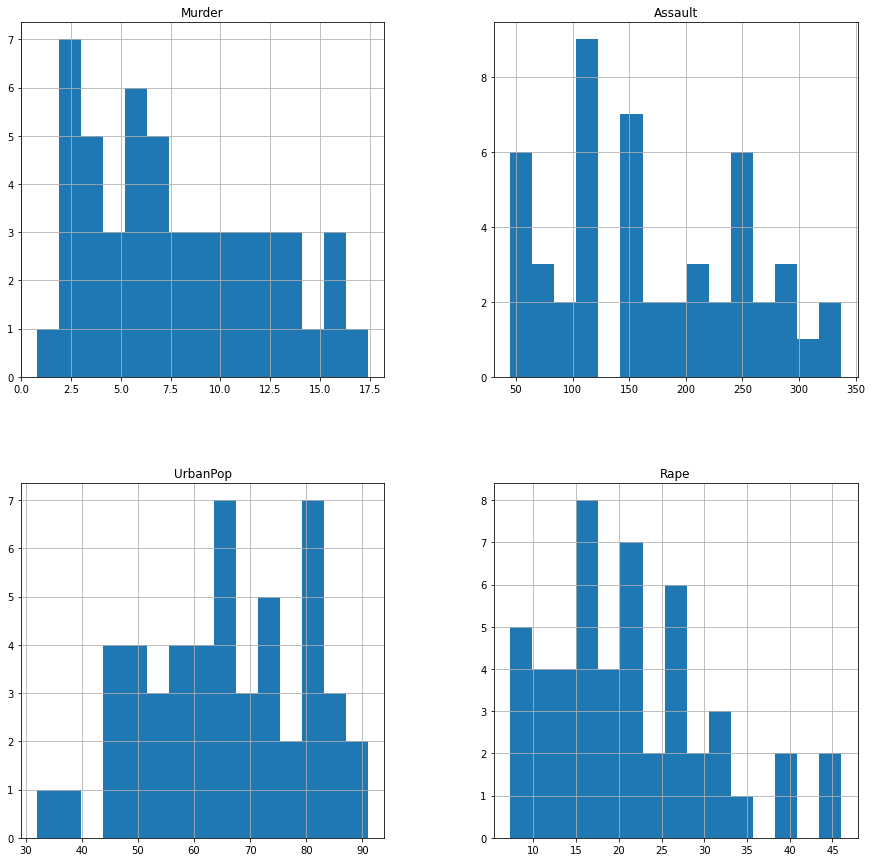

In [21]:
#comparing with the original no scaled.. check if more or less are the same pattern
arrests.hist(bins=15,figsize=(15,15));

## Clustering

In [22]:
K_Means=KMeans(n_clusters=5, random_state=5) # use always consistent randome state 

In [23]:
cluster_arrests_sc=K_Means.fit(arrests_scaled_df)

In [24]:
cluster_arrests_sc.cluster_centers_

array([[-0.23996529, -0.33082798, -0.0702524 , -0.1343076 ],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482]])

In [25]:
cluster_arrests_sc.labels_

array([1, 2, 2, 0, 2, 2, 4, 0, 2, 1, 4, 3, 2, 0, 3, 0, 0, 1, 3, 2, 4, 2,
       3, 1, 0, 0, 0, 2, 3, 4, 2, 2, 1, 3, 0, 0, 0, 0, 4, 1, 3, 1, 2, 4,
       3, 0, 0, 3, 3, 0])

In [26]:
#add cluster back into df
arrests_scaled_df['cluster_no']=cluster_arrests_sc.labels_

In [27]:
arrests_scaled_df['cluster_no'].value_counts()

0    15
2    12
3    10
1     7
4     6
Name: cluster_no, dtype: int64

In [28]:
cluster_nonscaled=K_Means.fit(arrests)

In [29]:
arrests_copy=arrests

In [30]:
arrests_copy['cluster']=cluster_nonscaled.labels_

In [31]:
arrests_copy['cluster'].value_counts()

2    14
1    12
0    10
3    10
4     4
Name: cluster, dtype: int64

# Visualize the cluster

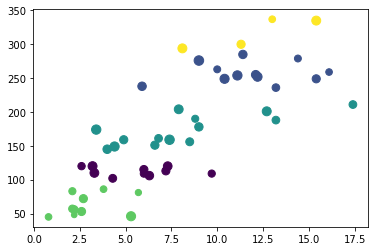

In [33]:
plt.scatter(arrests.iloc[:,0], arrests.iloc[:,1], arrests.iloc[:,2], arrests.iloc[:,4]);

In [34]:
arrests_copy.head(1)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1


In [102]:
# cant plot more then 5 things so if we have more than 5 we can plot different
# size
markersize=arrests_copy['UrbanPop']
# colour = cluster
markercolour=arrests_copy['cluster']
# fig
fig1=go.Scatter3d(x=arrests_copy['Murder'], y=arrests_copy['Rape'], z=arrests_copy['Assault'], 
                 marker=dict(size=markersize,
                            color=markercolour, 
                            opacity=0.9, 
                            colorscale='Blues'), 
                 line=dict(width=0.2), 
                 mode='markers')
# layout
mylayout=go.Layout(scene=dict(xaxis=dict(title='Murder'),
                              yaxis=dict(title='Rape'),
                              zaxis=dict(title='Assault')))

In [103]:
#html offline plot
plotly.offline.plot({'data':[fig1], 'layout':mylayout}, auto_open=True, filename=('5dplot.html'))

'5dplot.html'

# picking the optimum K

### 3 metrics: inertia, distorsion, silouhette score

In [63]:
#scaled data Kmeans model
cluster_arrests_sc.inertia_

24417.023523809523

In [64]:
arrests_scaled_df.drop('cluster_no', axis=1)

,murder,assault,urbanpop,rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [65]:
K=range(5,18)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=5)
    kmeans.fit(arrests_scaled_df)
    inertia.append(kmeans.inertia_)

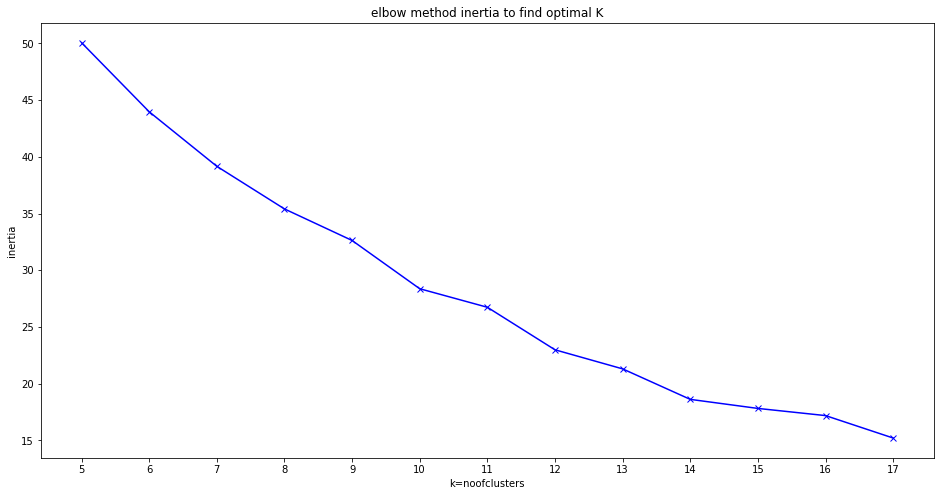

In [66]:
# plot the resulting inertia - elbow
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k=noofclusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method inertia to find optimal K');

In [67]:
K=range(5,18)
sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=5)
    kmeans.fit(arrests_scaled_df)
    sil.append(silhouette_score(arrests_scaled_df,kmeans.predict(arrests_scaled_df)))
#silhouette score
# if 1 - the clusters are very separated from each other and clearly distinguished
# if 0 - clusters are indifferent - the distance between them are not significant and you cannot 
# if -1 - clusters are incorrectly assigned

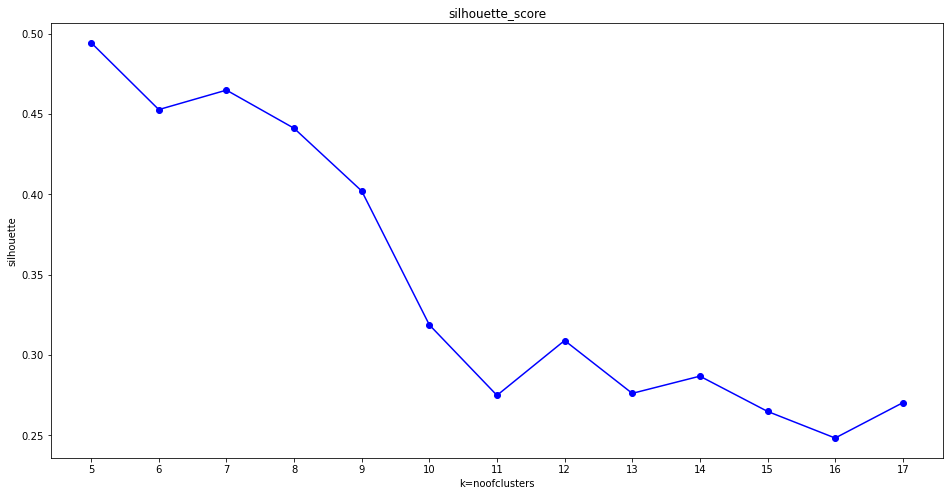

In [68]:
# plot the resulting silhouette
plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('k=noofclusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('silhouette_score');

# we go with k = 8 - lets redo the clustering

In [69]:
kmeans=KMeans(n_clusters=8, random_state=5)

In [70]:
ClMo=kmeans.fit(arrests_scaled_df)

In [71]:
arrests_scaled_df

,murder,assault,urbanpop,rape,cluster_no
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,2
2,0.072361,1.493817,1.009122,1.053466,2
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,2
5,0.025976,0.402909,0.869548,1.883901,2
6,-1.040880,-0.736484,0.799761,-1.092723,4
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,2
9,2.229265,0.487757,-0.386621,0.492653,1


In [72]:
arrests_scaled_df['cluster_final']=ClMo.labels_

In [73]:
arrests_scaled_df['cluster_final'].value_counts()

2    15
1    10
5     8
3     6
0     4
4     3
7     3
6     1
Name: cluster_final, dtype: int64

# introduce new data

In [78]:
new_d={'Murder':[18],'Assault':[320], 'UrbanPop':[60], 'Rape':[29]} # same headers as arrest Dataframe

In [79]:
new_row=pd.DataFrame(data=new_d)

In [80]:
new_row

,Murder,Assault,UrbanPop,Rape
0,18,320,60,29


In [81]:
new_row_scaled=scaler.transform(new_row)

In [82]:
new_row_scaled

array([[ 2.36842031,  1.80896805, -0.38662083,  0.83776883]])

In [83]:
new_row_scaled_df=pd.DataFrame(new_row_scaled, columns=['murder','assault','urbanpop','rape'])

In [104]:
ClMo.predict(new_row_scaled_df)

C:\Users\Sergi\anaconda3\envs\class\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- cluster_no




ValueError: X has 4 features, but KMeans is expecting 5 features as input.

### we have the cluster no of the new row - pick a state with the cluster no

In [87]:
c_new=0

In [90]:
arrests_scaled_df[arrests_scaled_df.cluster_final==c_new].sample(2)

,murder,assault,urbanpop,rape,cluster_no,cluster_final
0,1.255179,0.790787,-0.526195,-0.003451,1,0
17,1.765415,0.948363,0.032102,0.104398,1,0


In [92]:
arrests[8:9]

,Murder,Assault,UrbanPop,Rape,cluster
Florida,15.4,335,80,31.9,4


In [91]:
new_row

,Murder,Assault,UrbanPop,Rape
0,18,320,60,29
